In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import folium
import numpy as np
from tqdm.notebook import tqdm
from shapely.geometry import Polygon
%matplotlib inline

In [10]:
place = ['Outremont']
region_name = '+'.join(place)
ex = ox.graph_from_place(place, network_type = 'bike')
pot = ox.graph_from_place(place, network_type = 'bike')

In [11]:
Gd_proj = ox.project_graph(pot)
#pot_clean = ox.consolidate_intersections(Gd_proj, rebuild_graph=True, tolerance=10, dead_ends=False)
nodes_d, edges_d = ox.graph_to_gdfs(Gd_proj)
#edges_d = edges_d[edges_d.highway.isin(['residential','primary','secondary','tertiary','tertiary_link'])]
pot_clean = ox.graph_from_gdfs(nodes_d,edges_d)

In [12]:
Gb_proj = ox.project_graph(ex)
#ex_clean = ox.consolidate_intersections(Gb_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
nodes_b, edges_b = ox.graph_to_gdfs(Gd_proj)
edges_b = edges_b[edges_b.highway == 'cycleway']
ex_clean = ox.graph_from_gdfs(nodes_b,edges_b)

In [13]:
ox.io.save_graphml(ex_clean,'Data/Reseaux/ns_EX_'+region_name+'.graphml')
ox.io.save_graphml(pot_clean,'Data/Reseaux/ns_POT_'+region_name+'.graphml')

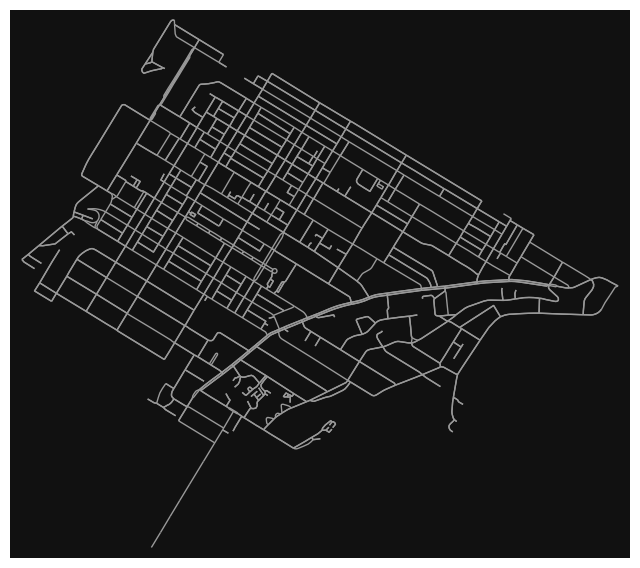

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [14]:
ox.plot_graph(pot_clean, node_size = 0)

In [10]:
edges_d.columns

Index(['osmid', 'highway', 'lanes', 'maxspeed', 'name', 'oneway', 'reversed',
       'length', 'geometry', 'u_original', 'v_original', 'junction', 'access',
       'service', 'tunnel', 'ref', 'width', 'bridge', 'est_width'],
      dtype='object')

In [11]:
pot = ox.graph_from_place(place, custom_filter='["bicycles"~"yes"]')

InsufficientResponseError: No data elements in server response. Check query location/filters and log.